In [ ]:
from sqlalchemy import create_engine
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
DB_PARAMS = {
    "dbname": os.getenv("POSTGRES_DB"),
    "user": os.getenv("POSTGRES_USER"),
    "password": os.getenv("POSTGRES_PASSWORD"), 
    "host": "postgres",
    "port":  5432
}

In [5]:
try:
    db_url = f"postgresql+psycopg2://{DB_PARAMS['user']}:{DB_PARAMS['password']}@{DB_PARAMS['host']}/{DB_PARAMS['dbname']}"
    engine = create_engine(db_url)

    query = """
        SELECT
            user_id,
            price::numeric
        FROM customers
        WHERE event_type = 'purchase';
    """
    df = pd.read_sql(query, engine)

except Exception as e:
    print(f"❌ An error occurred: {e}")

In [9]:
pd.set_option('display.float_format', '{:.6f}'.format)
print(df['price'].describe().to_string(index=True))

count   1285952.000000
mean          4.933093
std           8.927367
min         -79.370000
25%           1.590000
50%           3.000000
75%           5.400000
max         327.780000


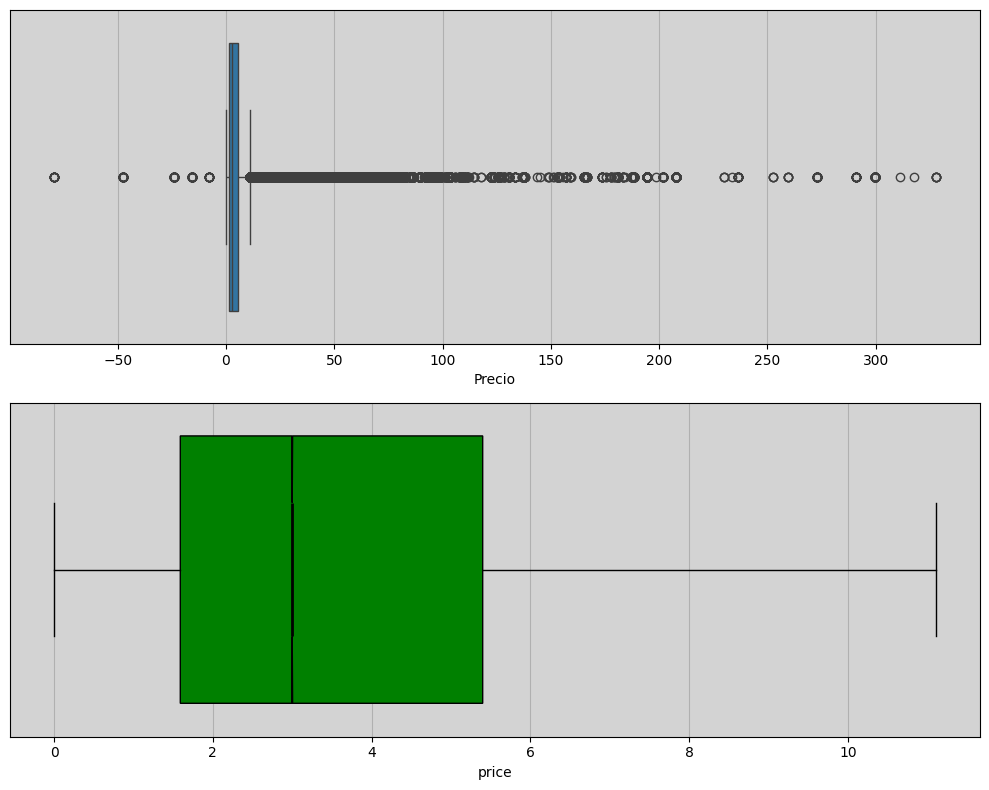

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')

sns.boxplot(x=df['price'], ax=ax1)
ax1.set_xlabel("Precio")
ax1.set_yticks([])
ax1.grid(True)

boxprops = dict(facecolor='green', edgecolor='black')
medianprops = dict(linestyle='-', linewidth=2, color='black')

ax2.boxplot(df['price'], vert=False, widths=0.8, notch=True,
            boxprops=boxprops, medianprops=medianprops, showfliers=False,
            patch_artist=True)
ax2.set_xlabel("price")
ax2.set_yticks([])
ax2.grid(True)

plt.tight_layout()
plt.show()

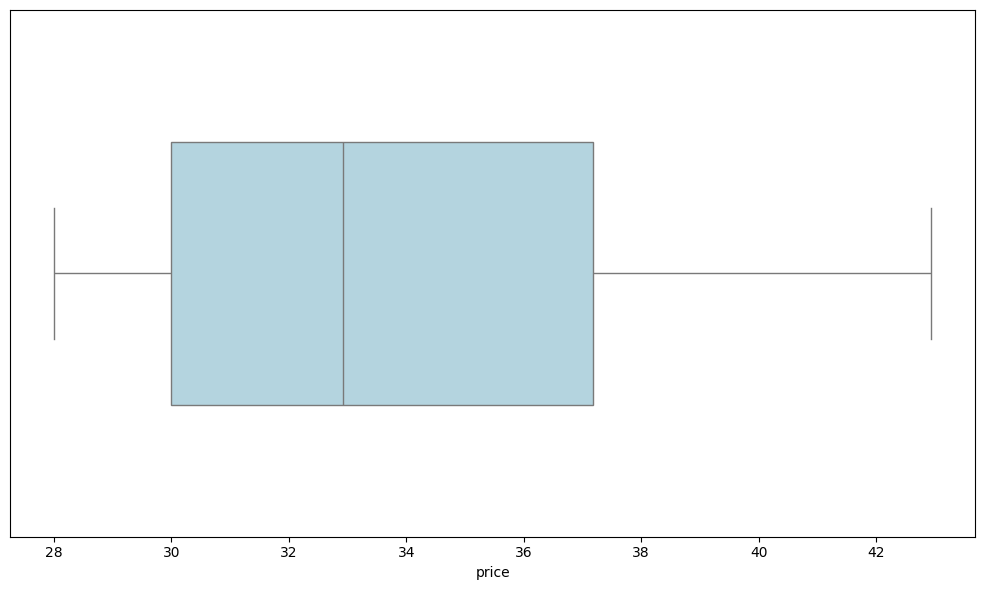

In [8]:
basket_price_per_user = df.groupby('user_id')['price'].mean().reset_index()
filtered_basket_price = basket_price_per_user[
    (basket_price_per_user['price'] >= 28) & (basket_price_per_user['price'] <= 43)
]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_basket_price['price'], color='lightblue', width=0.5)
plt.xticks(np.arange(int(filtered_basket_price['price'].min()), int(filtered_basket_price['price'].max()) + 1, step=2))
plt.tight_layout()
plt.yticks([])
plt.show()